# SVM (Sopport Vector Machine)

**when we want to draw classification boundry in scatter plot we have many possible ways to draw it**<br>
so to select best boundry :- Take nearby Data Points and find distance between line & point , and the line with maximum square sum of distance will be best option<br>
*these nearby Data Points are called support vectors*

SVM draws a hyper plane in N-Dimensional space such that it maximizes margin between classification groups

### Gamma & Regularization

High Gamma : consider only few nearer DataPoints to calculate Dist  (more accuracy poor computation)<br>
low Gamma  : consider many DataPoints  (less accuracy but good at computation)
<img src="21.jpg" width="300" height="300" >

 Low Regularization : straight boundry considering some errors (Better)
High Regularization : zig-zag line but no error
<img src="22.jpg" width="300" height="300" >

if in some case it is difficult to Draw Boundry then we can introduce a new plane & draw boundry there 
this new introduced plane called KERNEL
<img src="3.jpg" width="400" height="400" >

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
from matplotlib import pyplot as plt

In [9]:
%matplotlib inline

In [10]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [11]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


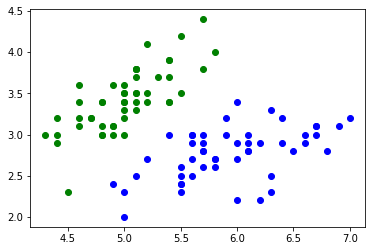

In [14]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='g')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='b')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.drop(['target', 'flower_name'], axis='columns')

In [17]:
y=df.target

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [19]:
from sklearn.svm import SVC
model = SVC()
# model = SVC(C=10)               # default C=1    # we increase regularisation in this case
# model = SVC(gamma=100)          # default gamma = 'auto'
# model = SVC(kernel='linear')    # default kernel='rbf'

In [20]:
model.fit(x_train, y_train)

SVC()

In [21]:
model.score(x_test, y_test)

0.9333333333333333